# Images classification using Deep Belief Network

In [3]:
import numpy as np
import random

from scipy.io import loadmat

%matplotlib inline
from matplotlib import pyplot as plt

### Loading and preprocessing the data

In [9]:
# Import data from matlab .mat file
data_dir = 'data'
# dir for data files 16px and 28 pix
data_dir_16split = data_dir + '/caltech101_silhouettes_16_split1.mat'
data_dir_28split = data_dir + '/caltech101_silhouettes_28_split1.mat'

# data reads from .mat file are stored within dict list annots
annots = loadmat(data_dir_28split)

# Create list of all classes read from data file 
classnames = []
# a mapping dictionary from class number to its name
i = 1
for classname in annots['classnames'][0]:
    classnames.append(classname[0])
    i += 1 
    
print("Read data stored within an annots list:\n\n", annots.keys(), "\n")

print("A list of all ", len(classnames), "mapped classnames:\n")
print(class_num_to_name)

Read data stored within an annots list:

 dict_keys(['__header__', '__version__', '__globals__', 'classnames', 'train_data', 'val_data', 'test_data', 'train_labels', 'val_labels', 'test_labels']) 

A list of all  101 mapped classnames:

{1: 'Airplanes Side 2', 2: 'Faces 2', 3: 'Faces 3', 4: 'Leopards', 5: 'Motorbikes 16', 6: 'accordion', 7: 'anchor', 8: 'ant', 9: 'barrel', 10: 'bass', 11: 'beaver', 12: 'binocular', 13: 'bonsai', 14: 'brain', 15: 'brontosaurus', 16: 'buddha', 17: 'butterfly', 18: 'camera', 19: 'cannon', 20: 'car side', 21: 'ceiling fan', 22: 'cellphone', 23: 'chair', 24: 'chandelier', 25: 'cougar body', 26: 'cougar face', 27: 'crab', 28: 'crayfish', 29: 'crocodile', 30: 'crocodile head', 31: 'cup', 32: 'dalmatian', 33: 'dollar bill', 34: 'dolphin', 35: 'dragonfly', 36: 'electric guitar', 37: 'elephant', 38: 'emu', 39: 'euphonium', 40: 'ewer', 41: 'ferry', 42: 'flamingo', 43: 'flamingo head', 44: 'garfield', 45: 'gerenuk', 46: 'gramophone', 47: 'grand piano', 48: 'hawksb

In [5]:
# an image is represented by an array of 256 or 784 elements (16x16pix or 28x28pix)
# train group: matrix 4082 x 256 means 4082 16x16 images within group
print("train data shape:", annots['train_data'].shape)
print("val data shape:",annots['val_data'].shape)
print("test data shape:", annots['test_data'].shape)
print()
# labels map each digit image to proper class
print("train labels shape:", annots['train_labels'].shape)
print("val labels shape", annots['val_labels'].shape)
print("test labels shape", annots['test_labels'].shape)

train data shape: (4100, 784)
val data shape: (2264, 784)
test data shape: (2307, 784)

train labels shape: (4100, 1)
val labels shape (2264, 1)
test labels shape (2307, 1)


In [6]:
# count number of images of each class within each label group
labels = ['train_labels', 'val_labels', 'test_labels']

# classes are within range 1-101, later caled class id
classes = [i for i in range(1, 102)]

# create empty nested dictionaries to store quantity of each class img within each group
dic_counts = { label:{ class_id: 0 for class_id in classes} for label in labels}

# write number of elements to each dictionary
for label in labels:
    for x in annots[label].tolist():
        dic_counts[label][x[0]] = dic_counts[label].get(x[0]) + 1 
        
# print data
i = 0
total =0
print("\033[1m{:<20}{:<10} {:<10} {:<10} {:<10} \033[0m".format('CLASS NAME', 'ID', 'TRAIN', "VAL", "TEST"))
for class_id in classes:
    print('{:<20}{:<10} {:<10} {:<10} {:<10}'.format(classnames[i], class_id, dic_counts['train_labels'][class_id],
                                                 dic_counts['val_labels'][class_id],
                                                 dic_counts['test_labels'][class_id]))
    i += 1
    total += dic_counts['train_labels'][class_id] +dic_counts['val_labels'][class_id] + dic_counts['test_labels'][class_id]
    # restrict output rows to 10 elements
    if i == 10:
        print('{:<20}{:<10} {:<10} {:<10} {:<10}'.format("...", "...", "...", "...", "..."))
        break
print("\ntotal number of elements:", total)

CLASS NAME          ID         TRAIN      VAL        TEST       
Airplanes Side 2    1          100        349        349       
Faces 2             2          100        167        168       
Faces 3             3          100        167        168       
Leopards            4          100        50         50        
Motorbikes 16       5          100        349        349       
accordion           6          33         11         11        
anchor              7          26         8          8         
ant                 8          26         8          8         
barrel              9          29         9          9         
bass                10         33         10         11        
...                 ...        ...        ...        ...       

total number of elements: 2906


Example of digit images of size: 28 x 28


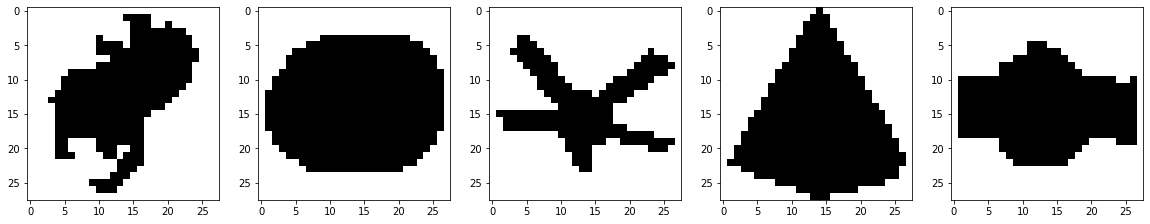

  scorpion                   pizza                    ceiling fan               pyramid                   watch                    


In [7]:
# displaying an exmaple images from a ndarray format
# set width and height, depends on read data
if annots['train_data'].shape[1] == 256:
    w, h = 16, 16
else:
    w, h = 28, 28

print("Example of digit images of size:", w, "x", h )
# an id's of 5 example images to be displayed, possible range: 'train_data' 0 - 4081, 'val_data' 0 - 2256, 'test_data' 0 - 2301 
# generate 5 random integers within proper range for chosen label
ids = [random.randint(0,4081) for _ in range(5)]
images = []
for id in ids:
    image = annots['train_data'][id]
    # ndarray to store data that can be displayed, width x height x RGB
    data = np.zeros((h, w, 3), dtype = np.uint8)
    row = 0
    column = 0 
    for x in image:
        if x == 1:
            data[row, column]=[255, 255, 255]
        row += 1 
        if row == h:
            column += 1 
            row = 0
    images.append(data)
# matplot used to display an image
i = 1
rows = 1
columns = len(ids)
fig = plt.figure(figsize=(20,20))
for data in images:
    fig.add_subplot(rows, columns, i)
    plt.imshow(data, interpolation='nearest')
    i += 1 
plt.show()
class_examples = [classnames[annots['train_labels'][x][0]-1] for x in ids]
print('  {:<27}{:<25}{:<26}{:<26}{:<25}'.format(class_examples[0], class_examples[1], class_examples[2], class_examples[3], class_examples[4]))